In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

In [2]:
train_dir = "C:\\Users\\HP\\Downloads\\Pneumonia X Ray\\Pneumonia X Ray\\train"
test_dir = "C:\\Users\\HP\\Downloads\\Pneumonia X Ray\\Pneumonia X Ray\\test"

IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 2040 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = test_generator.samples // BATCH_SIZE

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=validation_steps
)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 499ms/step - accuracy: 0.8060 - loss: 0.4810 - val_accuracy: 0.5167 - val_loss: 0.9744
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.9375 - loss: 0.2593 - val_accuracy: 0.0000e+00 - val_loss: 2.4201
Epoch 3/10


C:\Users\HP\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 479ms/step - accuracy: 0.8448 - loss: 0.3752 - val_accuracy: 0.5188 - val_loss: 1.1853
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.7812 - loss: 0.4098 - val_accuracy: 1.0000 - val_loss: 0.3164
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 502ms/step - accuracy: 0.8697 - loss: 0.3236 - val_accuracy: 0.7479 - val_loss: 0.5391
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.8438 - loss: 0.2911 - val_accuracy: 1.0000 - val_loss: 0.2326
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 502ms/step - accuracy: 0.8775 - loss: 0.2787 - val_accuracy: 0.7417 - val_loss: 0.5183
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.7917 - loss: 0.5725 - val_accuracy: 0.5000 - val_loss: 0.5671
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 500ms/step - accuracy: 0.8773 - loss: 0.2918 - val_accuracy: 0.5396 - val_loss: 0.8061
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.8125 - loss: 0.3915 - val_accuracy: 0.5000 -

In [8]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("Test Accuracy ", test_acc)

16/16 - 4s - 265ms/step - accuracy: 0.5868 - loss: 0.6318
Test Accuracy  0.586776852607727


In [9]:
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32").flatten()
true_classes = test_generator.classes

print(classification_report(true_classes, predicted_classes))

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step
              precision    recall  f1-score   support

           0       0.58      0.09      0.16       234
           1       0.52      0.94      0.67       250

    accuracy                           0.53       484
   macro avg       0.55      0.51      0.41       484
weighted avg       0.55      0.53      0.42       484



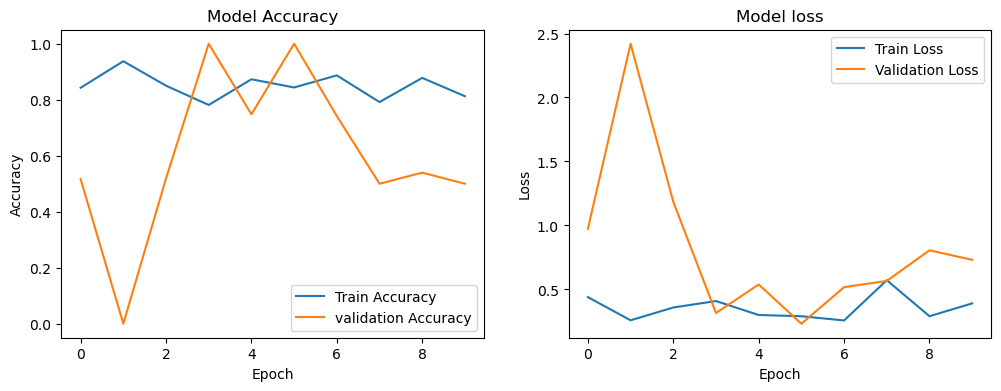

In [10]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


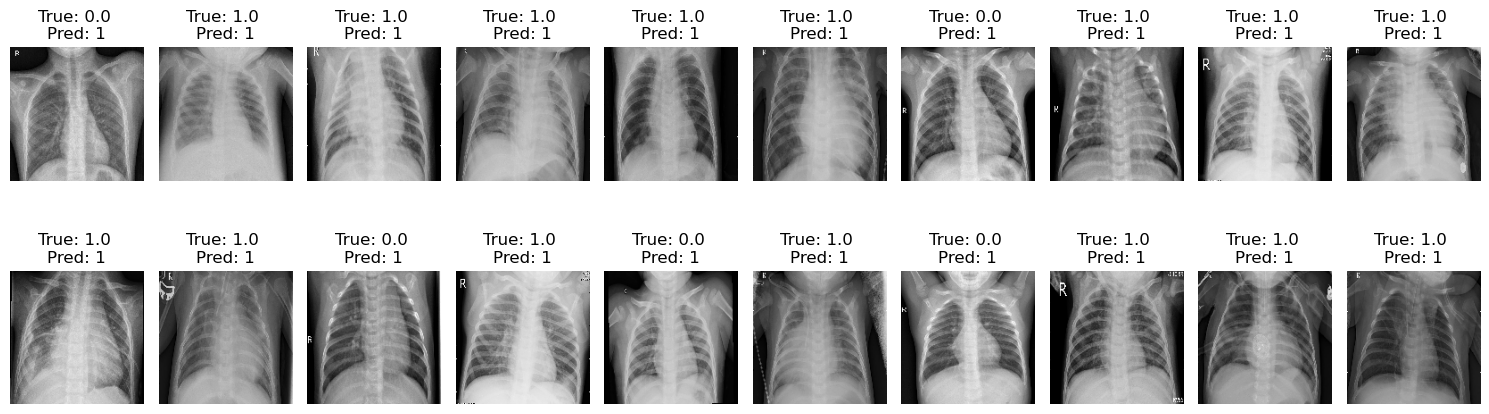

In [11]:
def plot_predictions(generator, num_images=20):
    images, labels = next(generator)
    
    predictions = model.predict(images)
    predicted_classes = (predictions > 0.5).astype("int32").flatten() 
    
    true_classes = labels.flatten()
    
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {true_classes[i]} \nPred: {predicted_classes[i]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_predictions(test_generator)